<a href="https://colab.research.google.com/github/ClarisseAlvarenga/Imersao_Alura_3_edicao/blob/main/Imers%C3%A3o_Dados_III_Alura_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMERSÃO DADOS ALURA - 3ª EDIÇÃO**

## **AULA 01 -  Análise de dados, python, pandas e novos fármacos**

In [33]:
#BASE DE DADOS
URL = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

### Importação de Bibliotecas

In [34]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **LENDO A BASE DE DADOS**

In [35]:
#lendo arquivo zipado com o pd.read_csv

dados = pd.read_csv(URL, compression='zip')

In [36]:
#lendo as primeiras 5 linhas do arquivo
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Cada linha representa um experimento, um tratamento de uma certa droga. Estamos tratando com [culturas celulares](https://kasvi.com.br/cultura-celular-estudo-das-celulas-tecnicas-de-cultivo/) que receberam um certo tratamento. 

só a título de curiosidade, pra deixar registrado: "As variáveis "g" são os genes. Cada "g" representa um gene. Os valores são suas expressões gênicas. Por exemplo, um valor negativo de "g-0" significa que a expressão dele foi menor/reduzida." - Vanessa Leiko "c" é o tipo de célula que foi utilizado (ex: células tumorais, células com alguma mutação, células de rim, fígado, etc) e o valor corresponde à viabilidade delas (quantas células sobreviveram). - Vanessa Leiko

### **Primeiras Análises**

In [37]:
#vendo quantas linhas e colunas tem na base de dados
dados.shape

(23814, 877)

In [38]:
#vendo quantos dados únicos eu tenho numa determinada coluna
dados.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

In [39]:
#buscando quais os quantas ocorrências de cada tipo de informação de uma coluna tratamento e sua proporção
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [40]:
dados.tempo.value_counts(normalize=True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

In [41]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [42]:
len(dados.droga.unique())

3289

In [43]:
pd.crosstab(index=dados.dose, columns= dados.tempo)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


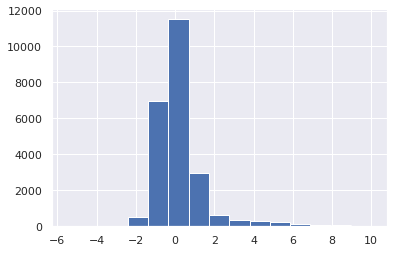

In [44]:
#criando um histograma dos dados da coluna g-0 usando apenas o pandas
dados['g-0'].hist(bins=15);

In [45]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


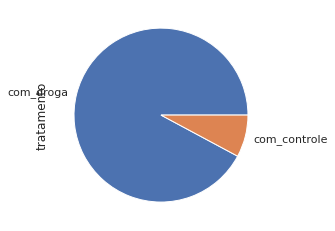

In [46]:
dados['tratamento'].value_counts().plot(kind='pie');

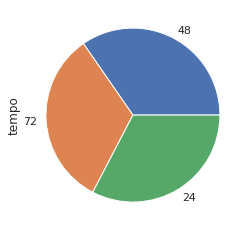

In [47]:
dados['tempo'].value_counts().plot.pie();

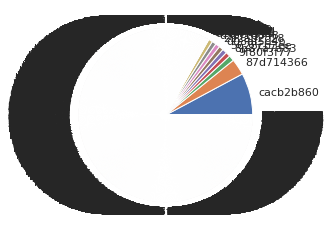

In [48]:
#porque gráficos de pizza não ajudam
dados['droga'].value_counts().plot(kind='pie');

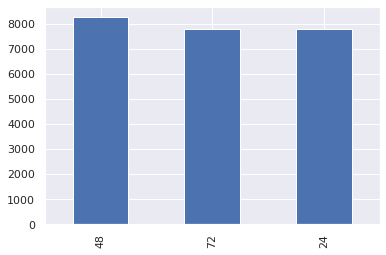

In [49]:
dados['tempo'].value_counts().plot.bar();

In [50]:
dados.loc[dados['g-0'] >0]

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.55

In [51]:
dados.query('`g-0`>0')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.55

### **DESAFIOS AULA 01**

#### **01 - Porque os dados da coluna tratamento são tão desbalanceados**

A seleção de controles é a [parte mais difícil e crítica de um estudo](https://edisciplinas.usp.br/pluginfile.php/4643741/mod_resource/content/1/casocontrole-corrigido.pdf). O controle deve ser uma amostra representativa da população do estudo, ou seja, neste caso, deve possuir as mesmas características da população que será testada com a droga. Mais sobre a importância dos estudos de caso-controle podem ser encontradas nesta [tese de doutorado](http://www.pee.ufrj.br/index.php/pt/producao-academica/teses-de-doutorado/2013/2013052701-2013052701/file)

Segundo este [artigo da UFG](https://files.cercomp.ufg.br/weby/up/59/o/Modulo3-Estudosdecaso-controle.pdf):

> O número de casos e controles a ser selecionado, depende do tamanho da amostra necessário para
testar uma hipótese. De maneira geral, o tamanho da amostra é inversamente proporcional ao risco
que se pretende detectar. Para se detectar um pequeno risco relativo (ex.: 1,2 ou seja, 20% de
aumento no risco comparado ao grupo controle) é necessário incluir um grande número de participantes. 

>Estudos conduzidos com poucos casos apresentam baixo poder estatístico para detectar riscos.
Para o cálculo do tamanho da amostra as seguintes informações são necessárias:

> * (1) nível de significância do teste (geralmente $α=5\%$)
* (2) o poder do teste (geralmente $1-β=80\%$)
* (3) a proporção de pessoas expostas ao fator de risco na população geral
* (4) o valor de odds ratio mínimo a ser detectado
* (5) razão entre o número de controles e casos

> Por exemplo, para:
>* $α = 5\%$,
* $poder do teste = 80\% (1-β)$,
* $10\%$ de expostos ao fator de risco na população geral e 
* **OR** (*odds ratio*) $= 2$,

> um total de 307 casos e 307 controles devem ser selecionados 



#### **02 - Plotar as 5 últimas linhas da tabela**

In [52]:
#resolvendo o desafio 2
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


#### **03 - Calcular a proporção das classes tratamento**

In [53]:
#vendo a proporção dos dados de tratamento - Expressão em porcentagem
round(dados['tratamento'].value_counts(normalize=True)*100, 2)

com_droga       92.16
com_controle     7.84
Name: tratamento, dtype: float64

#### **04 - Quantas drogas foram investigadas?**

In [54]:
#vendo quantas drogas foram investigadas
dados.droga.unique().shape

(3289,)

In [55]:
#usando uma função do python
len(dados['droga'].unique())

3289

#### **05 - Procurar na documentação o método query**

In [56]:
#usando template string para fugir do erro causado por causa do hífen
dados.query('`g-0` == 0')

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
894,id_090d5faab,com_droga,72,D1,c862a0e7a,0.0,-1.3750,-1.1620,0.1047,-0.8825,-0.4101,-0.3174,-2.2020,5.2740,-1.0340,-0.8664,1.3670,-0.4164,0.4271,-2.7730,-0.3544,-1.0410,0.4421,1.7410,0.4733,-1.3860,-0.2467,0.0994,0.8327,0.7951,1.2750,-0.7806,-0.1629,0.0760,-2.9180,-2.4220,-0.2317,-1.7270,2.2840,-1.1130,...,-4.2100,-0.6009,-2.7240,-1.5310,-2.8540,-0.6942,-0.6225,-7.6840,-1.0910,-0.3682,-0.8542,-2.3110,-3.1270,-1.8310,0.2385,-2.3740,-3.2640,-2.2080,-1.2900,-2.1420,-0.2269,-6.2370,-1.7390,-1.2130,-6.3690,-0.7507,0.1210,-1.2510,-0.8006,-0.5461,-1.4220,-1.2350,-6.9570,-0.8226,-1.8300,-4.3550,-1.0650,-1.8200,-1.3260,-0.7249
1380,id_0e68cbbb8,com_droga,72,D2,abec24ea6,0.0,0.8438,0.4109,0.2124,-0.6343,-1.9260,-0.8569,0.7996,0.2014,-0.1174,0.8253,-0.2036,0.4181,0.3549,0.0345,-0.4428,-2.1610,-0.0353,-0.5416,0.0000,-1.5990,-0.6052,-0.9436,0.0000,-0.4363,-0.2556,0.4068,-0.6288,-1.4230,-1.6510,-1.0050,-0.4949,-0.5917,-1.2780,0.1153,...,0.0333,-5.3510,-0.8472,-0.4084,1.7860,0.1130,-2.6870,-3.3800,1.0920,0.2337,-3.7480,-4.2830,-3.7000,-3.8120,-4.3730,-2.1290,-1.6750,-1.6530,-5.1280,-1.4190,-1.6230,-1.1340,-7.2410,-0.5898,-1.7560,0.7566,2.0800,-4.7070,-1.5010,-6.7130,-0.1058,-1.0400,-0.3975,-1.6020,-5.0440,-1.2210,-2.3280,-1.9860,-3.1180,0.4858
2201,id_1788469a3,com_droga,24,D1,b5ff305ac,0.0,0.2660,-0.6781,-0.2641,-0.2061,-0.5083,-0.4390,-0.3857,0.6479,0.6095,0.7251,0.1903,0.4065,-0.5573,1.1040,0.6175,0.2357,0.7649,0.2441,-0.1249,-0.7352,-0.3385,0.2188,0.7084,-0.6434,-0.1993,0.6136,1.0490,0.2311,0.6479,0.2384,-0.3015,0.6131,-0.9930,-1.2210,...,0.2584,-0.0147,0.3039,-0.2150,0.0699,0.5391,0.0743,1.6270,-0.8074,0.8279,0.0516,-0.1144,0.8035,0.6463,1.0010,0.5284,0.9499,-0.0433,1.2910,0.1197,0.7713,1.3560,0.4606,0.0349,0.1578,0.0232,0.9192,0.4155,0.0203,0.3746,0.8841,-0.0042,-0.0475,-0.0439,-0.8915,0.9616,0.4966,-1.2220,0.9120,-0.1879
3585,id_267bbbda0,com_droga,24,D2,19aae2313,0.0,-0.7200,0.3236,0.1556,-0.0591,0.0481,-0.2321,-0.1337,0.3287,0.8480,-0.1400,1.4220,-0.2257,-0.7646,0.8539,0.3999,1.3990,0.1208,-2.0500,-0.2435,0.3507,-0.0095,-0.0875,0.0000,0.3665,-0.6466,0.5579,0.8983,-0.3287,0.6727,0.5095,-0.4586,1.3500,0.1090,0.3411,...,0.1778,0.1227,-0.1722,-0.1014,1.1580,0.6374,0.0514,-0.4758,0.0049,0.3659,1.2290,1.1030,0.7365,0.3716,-0.2127,0.7565,0.0580,0.4888,-0.8575,-0.1664,-0.2515,0.1244,-0.2912,0.5870,1.5630,0.6114,-0.9676,0.5221,-0.7904,-0.9159,0.0035,0.2455,-0.0344,0.0580,0.7679,0.2350,0.6269,-0.1610,-0.7621,0.4061
4886,id_34a35a55c,com_droga,72,D2,6e6a1d184,0.0,-0.4838,0.5112,-0.2475,-0.3100,0.1773,-1.0380,-0.7967,-0.4351,-0.6942,0.4139,1.4040,1.0100,-0.3899,-0.4461,-0.5612,-0.8914,0.8701,0.0000,0.7419,-0.7950,-0.0451,-0.2657,-0.3858,-1.1250,0.8187,0.0554,-0.4076,0.0674,0.4592,-0.1927,0.9564,0.4847,-0.1879,1.6070,...,0.4254,0.1920,0.3266,0.6822,-0.4253,0.0658,0.7926,0.0610,0.4722,0.8955,0.5236,0.1778,0.5834,-0.1080,0.2519,-0.2397,-0.5963,0.6335,-0.1019,0.7438,-0.3964,-0.4621,0.0984,0.5499,1.1520,1.3890,-0.9094,0.1358,0.2234,0.2761,0.3149,0.9208,0.5584,0.1674,1.1510,0.3661,0.3130,0.2335,0.7553,0.9155
5595,id_3c3423a3d,com_droga,24,D1,954007658,0.0,-1.0170,0.0505,0.0839,-0.3201,-0.0570,-0.0902,0.2513,-0.4757,-1.0160,-0.3603,-0.4815,-0.3058,-0.5017,0.3719,-0.0476,0.3543,0.0575,-0.1865,0.6519,-0.3292,-0.3264,-0.5019,0.4669,0.7603,-0.1139,-0.2054,-0.9814,-0.4112,-1.2800,-0.2013,0.6038,1.1290,-0.1924,-1.8240,...,0.0209,-1.1070,-0.1162,-1.3830,-0.6472,-1.0760,-1.0370,0.0853,-0.9396,-0.3902,-0.2771,-1.0790,0.0902,-0.1070,0.4726,-1.1860,-0.8794,0.3203,0.3032,-0.7691,-0.7033,0.1820,-0.4463,-0.6732,-0.1649,-1.3950,-0.1454,-0.2222,-0.6245,0.0983,-0.4318,-1.1

#### **06 - Criar um gráfico mais bonitinho com Título**

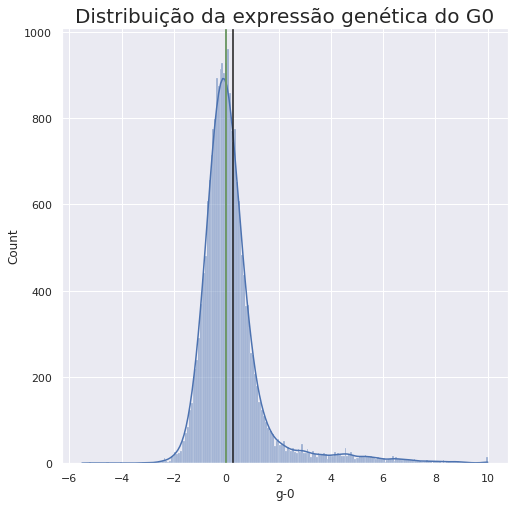

In [57]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.figure(figsize=(8,8))
sns.histplot(data=dados, x='g-0', kde=True)
plt.title("Distribuição da expressão genética do G0", fontsize=20)
plt.axvline(dados['g-0'].mean(), color='k')
plt.axvline(dados['g-0'].median(), color='r')
plt.axvline(dados['g-0'].mode()[0], color='g');


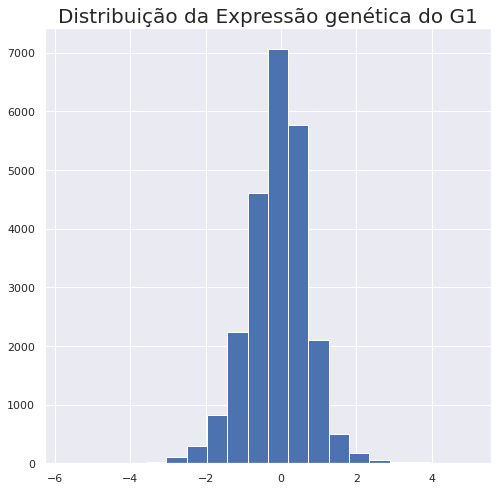

In [58]:
plt.figure(figsize=(8,8))
plt.hist(x='g-1', data=dados, bins=20)
plt.title('Distribuição da Expressão genética do G1', fontsize=20);

#### **07 - Renomear as colunas tirando o hífen**

In [59]:
#isso é só um teste
dados_teste = dados.copy()

In [60]:
#alterando o nome das colunas
dados.columns = dados.columns.str.replace("-", "")

In [61]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


#### **08 - Resumo do que você aprendeu com os dados**

Na primeira aula dessa imersão dados nós fomos capazes de:

 * Abrir um banco de dados em csv (zipado) usando o Pandas
 * Visualizar as linhas iniciais e finais dos dados, usando os comandos head and tail
 * Ver quantas linhas e colunas nossa base de dados possui, usando o comando shape
 * Ver os tipos dos dados constantes na nossa base de dados, usando o info
 * Comparar as informações das colunas tratamento, tempo e doses, vendo a proporção entre as categorias
 * Visualizar graficamente estas proporções usando o gráfico de pizza e o gráfico de barras. Constatar que o gráfico de barras é mais informativo que o gráfico de pizza
 * Ver a distribuição das expressões genéticas do g-0 usando um histograma, e aprendemos a colocar título e tema no gráfico
 * Fomos capazes de filtrar os dados por características, usando o subset, o loc e o query.
 * Renomeamos as colunas, tirando o hífen, que pode atrapalhar algumas funções



## **AULA 02 - Estatísticas, visualização de dados e distribuições** 

In [62]:
#renomeando a coluna "droga"
mapa  = {
    "droga":"composto"
}
#alterando permanentemente o nome da coluna
dados.rename(columns=mapa, inplace=True)

In [63]:
#separando os 5 compostos mais frequentes
cod_compostos = dados.composto.value_counts().index[:5]

In [74]:
#retornando os compostos com maior frequencia no dataframe
compostos_top5 = dados.query('composto in @cod_compostos')

#### **Desafio 01 - Ordenar os dados no gráfico**

In [65]:
#ordenando os dados
order = dados.composto.value_counts().index[:5]

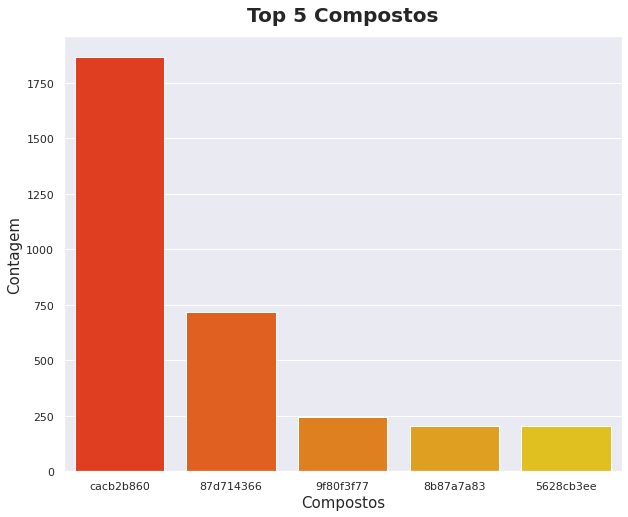

In [75]:
#definindo a área do gráfico
plt.figure(figsize=(10,8))
#criando o plot e mudando as cores
ax = sns.countplot(data = compostos_top5, x='composto', order=order, palette='autumn')
#inserindo o título, com fonte tamanho 20 e negrito com 15px de espaçamento
ax.set_title('Top 5 Compostos', fontdict={'fontsize':20, 'fontweight': 'bold'},pad=15)
#inserindo o rótulo do eixo y, com tamanho de fonte 15
ax.set_ylabel('Contagem', fontdict={'fontsize':15})
#inserindo o rótulo do eixo x, com tamanho de fonte 15
ax.set_xlabel('Compostos', fontdict={'fontsize':15});

In [67]:
len(dados.g0.unique())

14367

Resumo estatístico da coluna g0 e g1

In [83]:
#descrevendo os dados dos genes 0 e 1
dados[['g0', 'g1']].describe()

,g0,g1
count,23814.000000,23814.000000
mean,0.248366,-0.095684
std,1.393399,0.812363
min,-5.513000,-5.737000
25%,-0.473075,-0.562200
50%,-0.008850,-0.046600
75%,0.525700,0.403075
max,10.000000,5.039000


In [102]:
#usando o loc com expressão
descritivo_genes = compostos_top5.loc[:,dados.columns.str.startswith('g')].describe().T
descritivo_genes

,count,mean,std,min,25%,50%,75%,max
g0,3235.0,1.244173,2.447319,-4.859,-0.38030,0.3420,2.24750,10.000
g1,3235.0,-0.172371,1.094958,-5.737,-0.86685,-0.1606,0.46540,5.039
g2,3235.0,0.252820,1.137804,-9.104,-0.39975,0.1836,0.79825,8.257
g3,3235.0,0.413500,1.425223,-5.766,-0.41290,0.1831,0.92395,10.000
g4,3235.0,0.353476,1.659738,-5.805,-0.65780,0.1059,1.09200,10.000
...,...,...,...,...,...,...,...,...
g767,3235.0,-0.433047,1.728703,-10.000,-1.09000,-0.3359,0.37335,6.317
g768,3235.0,0.307788,1.495773,-4.269,-0.52945,-0.0510,0.61895,10.000
g769,3235.0,-0.400071,1.208762,-10.000,-0.95200,-0.3028,0.33830,4.046
g770,3235.0,-0.824447,2.141391,-10.000,-1.43800,-0.1672,0.49685,10.000


In [69]:
dados.g0.quantile([0.25, 0.5, 0.75])

0.25   -0.473075
0.50   -0.008850
0.75    0.525700
Name: g0, dtype: float64

#### **Desafio 03 - Plotar Histogramas com o Seaborn**

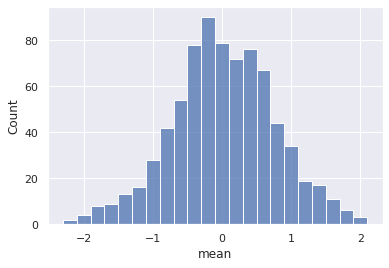

In [103]:
sns.histplot(data=descritivo_genes, x='mean');

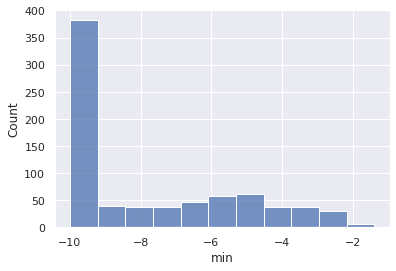

In [104]:
sns.histplot(data=descritivo_genes, x='min');

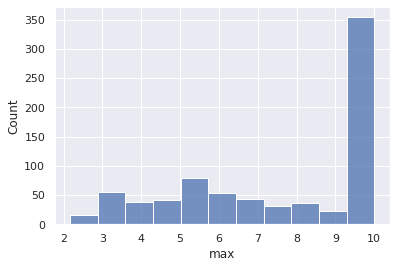

In [105]:
sns.histplot(data=descritivo_genes, x='max');

Plotando o histograma

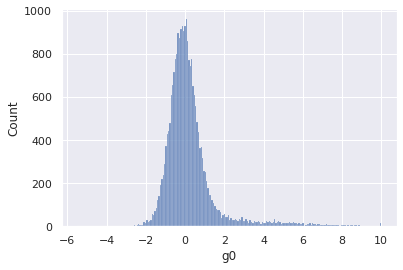

In [82]:
sns.histplot(data = dados, x='g0');

In [108]:
#fazendo o descritivo das colunas iniciadas com c (linhagens celulares)
descritivo_c = compostos_top5.loc[:,dados.columns.str.startswith('c')].describe().T
descritivo_c

,count,mean,std,min,25%,50%,75%,max
c0,3235.0,-1.584279,3.617173,-10.0,-1.1180,-0.0295,0.53150,2.779
c1,3235.0,-1.720641,3.891179,-10.0,-1.0230,0.0856,0.64985,2.682
c2,3235.0,-1.808512,4.019540,-10.0,-1.0350,0.0997,0.63635,2.366
c3,3235.0,-1.428631,2.933761,-10.0,-1.3260,-0.1904,0.33940,2.207
c4,3235.0,-1.904074,3.984054,-10.0,-1.3705,-0.0247,0.55060,3.132
...,...,...,...,...,...,...,...,...
c95,3235.0,-1.287441,3.130759,-10.0,-1.1150,-0.0287,0.49570,2.434
c96,3235.0,-2.008471,3.993905,-10.0,-1.6660,-0.1291,0.45435,2.553
c97,3235.0,-1.560711,3.356103,-10.0,-1.3415,-0.0595,0.49295,2.266
c98,3235.0,-1.560089,3.332840,-10.0,-1.6995,-0.0375,0.51960,2.110


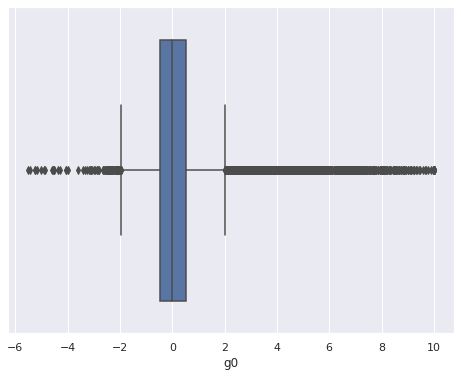

In [111]:
plt.figure(figsize=(8,6))
sns.boxplot(x='g0', data=dados, );

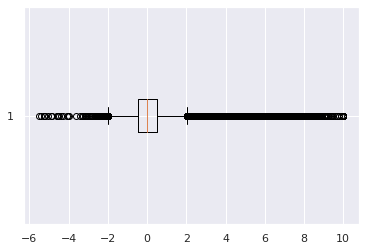

In [114]:
plt.boxplot(x='g0', data=dados, vert=False);

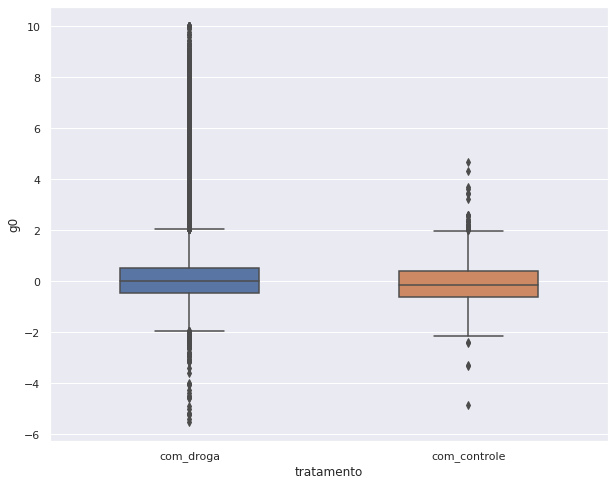

In [118]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', data=dados, x='tratamento', width=0.5 );

#### **Desafio 03: Plotar os histogramas com seaborn**

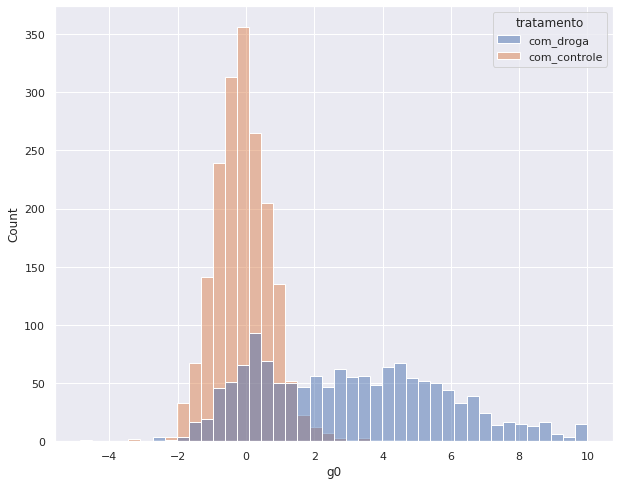

In [136]:
#histograma com hue de tratamento.
plt.figure(figsize=(10,8))
sns.histplot(data=compostos_top5, x='g0', hue='tratamento', );

#### **Desafio 06: Fazer outras análises com o boxplot e até com o histograma**

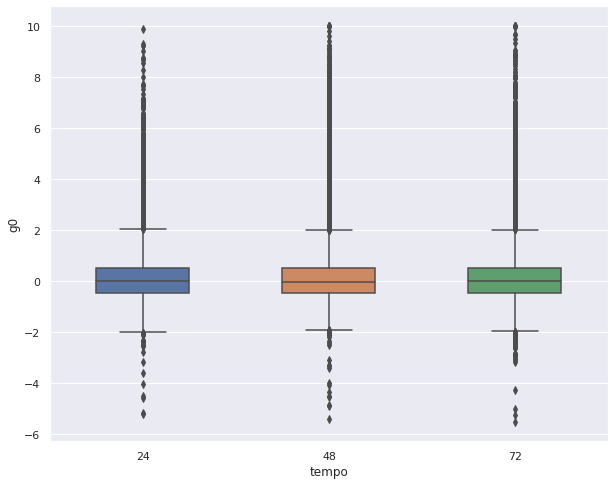

In [119]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g0', data=dados, x='tempo', width=0.5 );

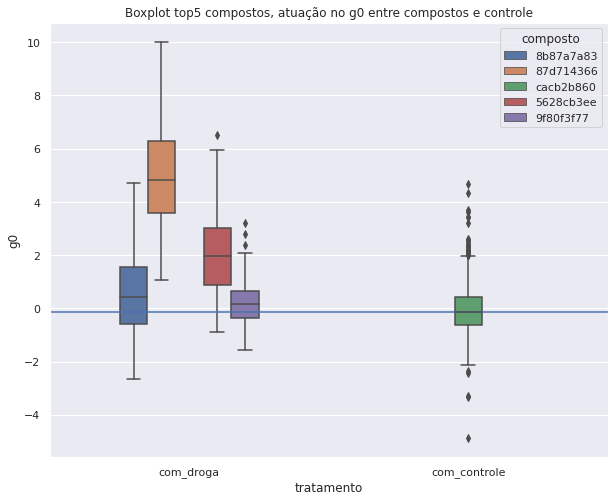

In [133]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='g0', data=compostos_top5, x='tratamento', width=0.5, hue='composto' )
ax.set_title('Boxplot top5 compostos, atuação no g0 entre compostos e controle')
ax.axhline(y=dados.query('tratamento == "com_controle"')['g0'].median());

In [122]:
#conferindo se há mais de um composto de controle
dados.query('tratamento == "com_controle"')['composto'].unique()

array(['cacb2b860'], dtype=object)

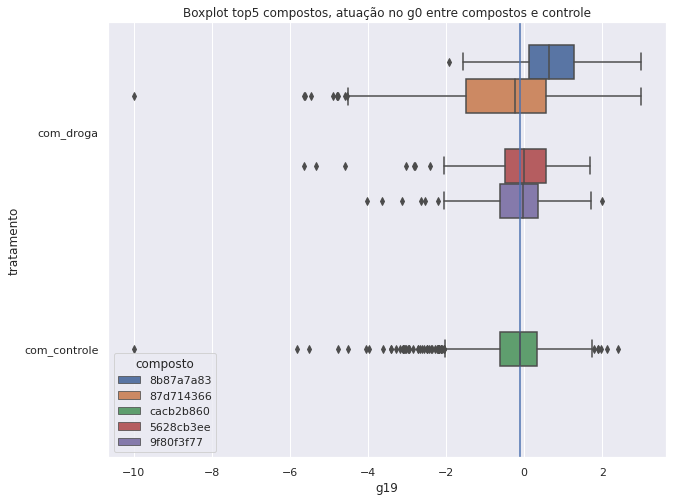

In [131]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='g19', data=compostos_top5, y='tratamento', hue='composto' )
ax.set_title('Boxplot top5 compostos, atuação no g0 entre compostos e controle')
ax.axvline(x=dados.query('tratamento == "com_controle"')['g19'].median());

#### **Desafio 07 - Resumo do que Aprendemos com os dados**

* Renomear colunas usando o rename e um dicionário
* Calcular as estatísticas descritivas dos dados contínuos usando o describe e as funções específicas por medida (min, max, median, quantile, std)
* Subset de dataframe usando Loc
* Chamar variável externa no query com @
* Transpor uma tabela usando o T (transpose)
* Criar countplots, histplots e boxplots com seaborn e matplotlib
* alterar o tamanho da área de plotagem de um gráfico
* Ordenar os dados num gráfico de barras
* Aumentar o tamanho da fonte, o espaçamento e colocar em negrito no título do gráfico
* alterar o esquema de cores de um gráfico
* Efeito de distorção do gráfico
* Analisar um boxplot
* Inclusão de linhas verticais e horizontais em gráficos com o matplotlib e o seaborn.
* criar boxplots para analisar duas variáveis em conjunto usando o x e y
* Qual dos compostos foi usado como controle. 

### **DESAFIOS - checklist**

* Desafio 01: Ordenar o gráfico countplot - OK
* Desafio 02: Melhorar a visualização alterando tamanho da fonte - OK
* Desafio 03: Plotar os histogramas com seaborn -ok
* Desafio 04: Estudar sobre as estatíticas retornadas no .describe() - ok
* Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.
* Desafio 06: Fazer outras análises com o boxplot e até com o histograma. - ok
* Desafio 07: Resumo do que você aprendeu com os dados - ok

## **AULA 03 -**